## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics, linear_model

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Iris dataset
#### Ans: 調整 DecisionTreeClassifier(...) 中的參數，Test Acuuracy 沒有改變

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=16, min_samples_leaf=8)

cross_val_score(clf, x_train, y_train, cv=5)

array([0.95652174, 0.86956522, 0.95454545, 0.90909091, 0.95454545])

In [3]:
# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [4]:
acc_train = metrics.accuracy_score(y_train, clf.predict(x_train))
acc_test = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: train={} test={} ".format(acc_train, acc_test))

Acuuracy: train=0.9553571428571429 test=0.9736842105263158 


## Boston dataset
#### Ans: LinearRegression 的 test error: 25.42; DecisionTreeRegressor 的 test error: 23.58

In [5]:
# 讀取boston資料集
boston = datasets.load_boston()

In [6]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


max_depth=2 Mean squared error: train=23.19 test=38.35
max_depth=4 Mean squared error: train=9.56 test=28.77
max_depth=6 Mean squared error: train=4.89 test=24.94
max_depth=8 Mean squared error: train=2.26 test=23.58
max_depth=10 Mean squared error: train=1.01 test=23.76
max_depth=12 Mean squared error: train=0.26 test=24.73
max_depth=14 Mean squared error: train=0.03 test=26.25
max_depth=16 Mean squared error: train=0.00 test=24.57
max_depth=18 Mean squared error: train=0.00 test=26.24


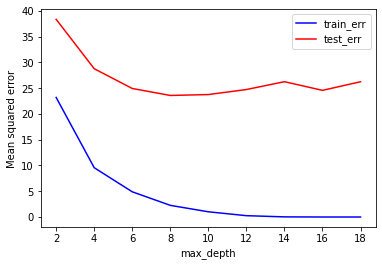

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

train_err_lst = []
test_err_lst = []
for i in range(2,20,2):
    tree = DecisionTreeRegressor(criterion='mse', max_depth=i)
    
    # 訓練模型
    tree.fit(x_train, y_train)

    # 預測測試集
    y_pred = tree.predict(x_test)

    # 預測值與實際值的差距，使用 MSE
    train_err = metrics.mean_squared_error(y_train, tree.predict(x_train))
    test_err =  metrics.mean_squared_error(y_test, y_pred)
    print("max_depth={} Mean squared error: train={:.2f} test={:.2f}".format( i, train_err, test_err))  
    
    train_err_lst.append(train_err)
    test_err_lst.append(test_err)
    
plt.plot(list(range(2,20,2)), train_err_lst, 'b', label='train_err')    
plt.plot(list(range(2,20,2)), test_err_lst, 'r', label='test_err')
plt.xlabel('max_depth')
plt.ylabel('Mean squared error')
plt.legend()